# The Iris Classification

A lo largo de esta notebook se utilizará el poder de la computación en la nube con Google Colab para un ejemplo clásico: el problema de clasificación de Iris, usando el popular conjunto de datos de [Iris flower dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set).

Para este problema de clasificación, se construirá una red neuronal artificial simple, totalmente conectada y de tipo feed-forward.

La red, una vez entrenada, debería ser capaz de reconocer la especie flor que se le ha dado en el input.

In [ ]:
#Instalamos la ultima versión de TensorFlow
!pip install -q tensorflow

#Verificamos la versión instalada
import tensorflow as tf
print(tf.__version__)

2.18.0


## El dataset Iris

In [ ]:
from IPython.display import HTML
url = 'https://en.wikipedia.org/wiki/Iris_flower_data_set'
iframe = '<iframe src=' + url + ' width="80%" height=300></iframe>'
# HTML(iframe)

In [ ]:
# Importamos el dataset from scikit-learn y otros paquetes útiles:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np

# Fijamos una semilla para poder reproducir los resultados:
seed = 13
np.random.seed(seed)

In [ ]:
# Cargamos el dataset de Iris
iris = load_iris()

# Asignamos los vectores de datos, etiquetas y nombres
x = iris['data']               # características (features)
y = iris['target']             # etiquetas (targets)
names = iris['target_names']   # nombres de las especies
feature_names = iris['feature_names']  # nombres de las características

In [ ]:
# # Podemos cargar algunos elementos para verificar el contenido del dataset
elements_to_display = [0, 50, 100]  # un ejemplo de una flor de cada especie
# for element in elements_to_display:
#     print(f"Elemento {element}:")
#     print(f"  - Características: {x[element]}")
#     print(f"  - Etiqueta: {y[element]}")
#     print(f"  - Especie: {names[y[element]]}")
#     print()

A continuacion se modifican las etiquetas (y) del dataset haciendo una transformación de una etiqueta entera (como 0, 1 o 2) en un vector binario. Esta transformación se conoce con el nombre de **one-hot encoding**.
Esto es necesartio ya que la salida de la red neuronal será un vector con tres probabilidades, por lo tanto es necesario que el objetivo esté representado también como vector para luego poder hacer comparaciones y calculos de error.

In [ ]:
from tensorflow import keras

# One hot encode:
y = keras.utils.to_categorical(y)

# Variables globales:
n_features = len(feature_names)
n_classes = names.shape[0]

In [ ]:
# # Chequiemos los cambios:
# for element in elements_to_display:
#     print(f"Element {element}th:")
#     print(f"  - Features: {x[element]}")
#     print(f"  - Target: {y[element]}")
#     print(f"  - Species: {names[element % 3]}")
#     print()

A continuación se divide el dataset en dos subconjuntos, cada uno un porcentaje del inicial. El primer subconjunto "Entrenamiento" servirá para entrenar la red neuronal y el segundo "Test" se utilizará para hacer pruebas una vez que la red este entrenada para ver cuanto ha aprendido. En este caso los porcentajes elegidos serán Entrenamiento (70%) y Prueba/test (30%).

In [ ]:
# Split the data set into training and testing sets:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.3,
                                                    random_state=seed)

## El Modelo

In [ ]:
# Importemos mas cosas utiles de Keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [ ]:
def iris_model(input_dim, output_dim, init_nodes=4, name='model'):
    """FF-MLP model for Iris classification problem."""

    # Crear modelo secuencial
    model = Sequential(name=name)

    model.add(Dense(init_nodes, input_dim=input_dim, activation='relu'))
    model.add(Dense(2 * init_nodes, activation='relu'))
    model.add(Dense(3 * init_nodes, activation='relu'))
    model.add(Dense(output_dim, activation='softmax'))

    # Compilar modelo con función de pérdida adecuada para clasificación multiclase
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

In [ ]:
# Creación del modelo:
model = iris_model(input_dim=n_features, output_dim=n_classes)
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 12)             │           108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            39 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 207 (828.00 B)

 Trainable params: 207 (828.00 B)

 Non-trainable params: 0 (0.00 B)

## Entrenando el modelo

Para entrenar el modelo se debe elegir previamente el valor de dos **hiperparametros**



*   Epoch: cantidad de veces que el modelo ve todo el conjunto de entrenamiento.
*   Batch: cantidad de ejemplos que se usan por vez para actualizar los pesos.

En un dataset chico, como es el dataset Iris se recomiendo usar valores pequeños de estos parametros.

In [ ]:
# Elegimos los hiperparametros
epochs = 100
batch = 8

# Entrenamos el modelo y guardamos su entrenamiento en la variable history
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    verbose=False,   #para que no me muestre mientras va entrenando
                    epochs=epochs,
                    batch_size=batch)

## Evaluando el modelo

In [ ]:
# Evaluate devuelve un lista de dos valores: loss y accuracy
scores = model.evaluate(x_test, y_test, verbose=False)
print(f'Test accuracy: {scores[1]}')

Test accuracy: 0.9111111164093018


### Veamos algunos graficos del entrenamiento

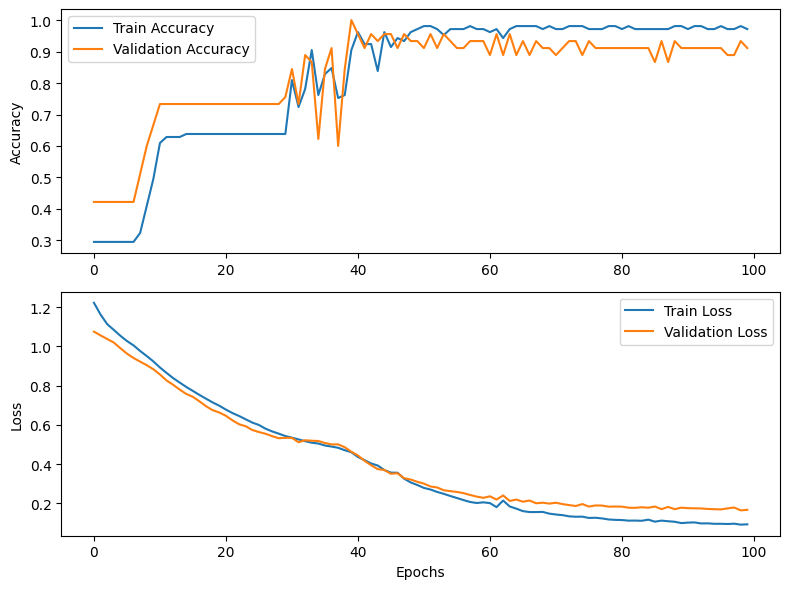

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

# Accuracy de entrenamiento y validación
ax1.plot(history.history['accuracy'], label='Train Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')

# Pérdida (loss) de entrenamiento y validación
ax2.plot(history.history['loss'], label='Train Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')

# Configuración de etiquetas y leyenda
ax1.set_ylabel('Accuracy')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epochs')

# Agregar leyendas
ax1.legend()
ax2.legend()

# Ajustar layout y mostrar gráfico
plt.tight_layout()
plt.show()

## Predicciones con datos nuevos

In [ ]:
# Remembering some elements:
for element in elements_to_display:
    prediction_vector = model.predict(np.array([x[element]]))
    print(f"Element {element}th:")
    print(f"  - Features: {x[element]}")
    print(f"  - Target: {y[element]}")
    print(f"  - Scpecies: {names[np.argmax(y[element])]}")
    print(f"  - Predicted species: {names[np.argmax(prediction_vector)]}")
    print()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Element 0th:
  - Features: [5.1 3.5 1.4 0.2]
  - Target: [1. 0. 0.]
  - Scpecies: setosa
  - Predicted species: setosa

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Element 50th:
  - Features: [7.  3.2 4.7 1.4]
  - Target: [0. 1. 0.]
  - Scpecies: versicolor
  - Predicted species: versicolor

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Element 100th:
  - Features: [6.3 3.3 6.  2.5]
  - Target: [0. 0. 1.]
  - Scpecies: virginica
  - Predicted species: virginica



## Evaluación del entrenamiento del modelo

Se entrenó un modelo de red neuronal para la clasificación del dataset Iris. A continuación se detalla el comportamiento del entrenamiento y validación:

✅ Precisión: la precisión en entrenamiento se estabiliza cerca del 100%, mientras que en validación se mantiene en torno al 90%, lo cual indica un buen nivel de generalización.

📉 Pérdida: tanto la pérdida de entrenamiento como la de validación disminuyen de forma progresiva y constante a lo largo de las épocas.

🧠 No hay señales claras de sobreajuste (overfitting): si bien la precisión de entrenamiento es un poco más alta, las curvas de pérdida se mantienen alineadas y la de validación no se estanca ni empeora.

🧪 El modelo alcanzó una precisión final en el conjunto de prueba del 91.1%, lo cual es un resultado muy satisfactorio considerando la simplicidad del modelo y la cantidad de datos.